In [8]:
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import ace_tools_open as tools; 
import spacy
from spacy.lang.pt.examples import sentences 
from string import punctuation
import matplotlib.pyplot as plt
from transformers import pipeline
import tensorflow as tf
from bs4 import BeautifulSoup
import requests
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from collections import Counter
import numpy as np

In [39]:
nlp = spacy.load('pt_core_news_sm') # commented out once it's loaded

punctuations = list(punctuation)

In [36]:
# Newspapers to search

newsp = ['cmjornal.pt/', 
         'dn.pt/',
         'expresso.pt/',
         'folhanacional.pt/',
         'jn.pt/',
         'ionline.sapo.pt/',   
         'sol.sapo.pt/',
         'observador.pt/',
         'publico.pt/',
         'sabado.pt/',
         'sapo.pt/',
         'visao.pt/',
         ]

not_keywords = ["/multimedia", "/videos", 
                "/famosos", "/celebridades", 
                "/tecnologia", "/boa-vida", 
                "/tendencias", "/desporto",
                "/maissobre", "/ciencia",
                "/cinema", "/cultura",
                "/cidades", "/dinheiro",
                "/blogues", "/podcasts",
                "/vida", "/artes",
                "/iniciativas", "/colunistas/andre",
                "/tribuna"]

stop_words = {'comprida', 'lá', 'mesmo', 'ela', 'de', 'quero', 'vão', 'nesta', 'em', 'com',
              'tais', 'neste', 'obrigado', 'bom', 'for', 'vai', 'fazer', 'tens', 'alguns', 'todos',
              'tu', 'muito', 'estás', 'deve', 'novas', 'todo', 'foste', 'pode', 'pontos', 'pegar',
              'quieto', 'seria', 'eles', 'coisa', 'faz', 'sou', 'daquela', 'tua', 'suas', 'teu',
              'cuja', 'esses', 'vindo', 'aquele', 'um', 'certamente', 'essa', 'no', 'vens', 'também',
              'maiorias', 'fostes', 'tanta', 'elas', 'desse', 'diante', 'pelas', 'nove', 'quinta', 'maior',
              'do', 'quando', 'aqueles', 'desta', 'sabe', 'ambas', 'que', 'tentar', 'estes', 'próximo',
              'povo', 'sem', 'uns', 'tão', 'além', 'geral', 'porquanto', 'fora', 'vêm', 'tivemos',
              'depois', 'ir', 'ora', 'tarde', 'nessa', 'da', 'nós', 'ver', 'tiveram', 'tem',
              'cada', 'exemplo', 'número', 'meus', 'tuas', 'conhecido', 'cento', 'devem', 'para', 'fomos',
              'à', 'favor', 'quanto', 'teve', 'apenas', 'este', 'vais', 'mas', 'querem', 'lugar',
              'vinte', 'quê', 'após', 'apoio', 'mal', 'quarta', 'grande', 'adeus', 'pelos', 'parece',
              'dezanove', 'ligado', 'sob', 'estou', 'ao', 'final', 'talvez', 'demais', 'aos', 'agora',
              'você', 'nem', 'maioria', 'vez', 'treze', 'menor', 'temos', 'possível', 'ambos', 'não',
              'isto', 'dezoito', 'tempo', 'estas', 'área', 'nenhuma', 'fui', 'estará', 'cujo', 'faço',
              'bem', 'logo', 'quais', 'onde', 'menos', 'aquela', 'quatro', 'outras', 'pouca', 'dar',
              'dezasseis', 'último', 'valor', 'é', 'antes', 'aqui', 'mais', 'sétimo', 'dizem', 'estão',
              'veja', 'dezassete', 'ele', 'tivestes', 'tive', 'quarto', 'nova', 'bastante', 'pois', 'apoia',
              'outra', 'teus', 'caminho', 'fazeis', 'lado', 'somente', 'esteve', 'fazemos', 'nesse', 'dessa',
              'numa', 'qualquer', 'momento', 'assim', 'esse', 'boa', 'pôde', 'duas', 'longe', 'meio',
              'saber', 'és', 'ponto', 'daquele', 'estava', 'irá', 'perto', 'num', 'aí', 'umas',
              'nossas', 'falta', 'o', 'dão', 'quer', 'custa', 'tipo', 'sexto', 'vinda', 'segundo',
              'sétima', 'ter', 'seu', 'poder', 'enquanto', 'algo', 'sois', 'se', 'poderá', 'grandes',
              'naquele', 'dá', 'novos', 'tanto', 'cedo', 'vossas', 'cima', 'posição', 'era', 'na',
              'ser', 'vossos', 'seis', 'terceira', 'fim', 'onze', 'disso', 'tentei', 'iniciar', 'minha',
              'apontar', 'estiveram', 'quem', 'fará', 'até', 'sexta', 'zero', 'pouco', 'então', 'sei',
              'vossa', 'ainda', 'nuns', 'parte', 'sua', 'a', 'mês', 'acerca', 'terceiro', 'primeiro',
              'estar', 'oitava', 'grupo', 'porquê', 'contra', 'me', 'forma', 'dizer', 'sete', 'toda',
              'dois', 'portanto', 'estado', 'podia', 'vos', 'máximo', 'vocês', 'comprido', 'tenho', 'baixo',
              'somos', 'através', 'são', 'quinto', 'nada', 'segunda', 'outros', 'sempre', 'vosso', 'certeza',
              'debaixo', 'oitavo', 'lhe', 'dos', 'mil', 'têm', 'desde', 'nível', 'nos', 'usar',
              'primeira', 'fazes', 'fazia', 'tiveste', 'deste', 'corrente', 'oito', 'vós', 'doze', 'das',
              'sistema', 'inclusive', 'já', 'vem', 'contudo', 'minhas', 'cinco', 'estivestes', 'naquela', 'nas',
              'vários', 'tal', 'fazem', 'tentaram', 'posso', 'estiveste', 'direita', 'isso', 'embora', 'pela',
              'uma', 'breve', 'nossa', 'números', 'nossos', 'essas', 'dentro', 'deverá', 'partir', 'próxima',
              'eventual', 'conselho', 'às', 'esta', 'foi', 'só', 'te', 'possivelmente', 'obrigada', 'relação',
              'meses', 'três', 'põem', 'quieta', 'fez', 'ali', 'aquilo', 'sobre', 'qual', 'atrás',
              'estive', 'está', 'sim', 'estivemos', 'todas', 'cá', 'ou', 'muitos', 'porque', 'foram',
              'algumas', 'pelo', 'por', 'tente', 'questão', 'nosso', 'local', 'novo', 'nunca', 'como',
              'meu', 'tudo', 'porém', 'as', 'vezes', 'usa', 'os', 'diz', 'e', 'dez',
              'ademais', 'seus', 'conhecida', 'ontem', 'quinze', 'põe', 'des', 'entre', 'eu', 'catorze',
              'próprio', 'tendes', 'aquelas', 'podem', 'inicio', 'puderam', 'de o', 'correio', ' ', 'manhã',
              'a o', 'comentário', 'conteúdo', 'espaço', 'leitor', '', '”','“', 'em o', 'em a', 'em os', 'em as', 'em',
              'em de', 'em da', 'em do', 'em dos', 'em para', 'em por', 'em com', 'em sem', 'em sobre', 'em sob', 'em acerca',
              'em um', 'em uma', 'em uns', 'em umas', 'em ao', 'em à', 'em aos', 'em às', 'em na', 'em no', 'em nas', 'em nos',
              ' ', '  ', '...'}

In [37]:
df = pd.read_csv('working_file_111224.csv')

# Drop the columns authors, published_date, unnamed: 0, lemmas, Lemma_string, year, lemmas_filtered
df = df.drop(columns=['authors', 'publish_date', 'Unnamed: 0', 'Lemmas', 'Lemma_String', 'year', 'Lemmas_filtered', 'text'])
# Display df using ace tools
tools.display_dataframe_to_user(name="Frequency of Text Length Bins", dataframe=df)
# Count not NaN values in column text
df['filtered_text'].count()


KeyError: "['authors', 'publish_date', 'Unnamed: 0', 'Lemmas', 'Lemma_String', 'text'] not found in axis"

In [40]:
lemmas_dict = {}

# Loop through each text along with its index
for index, row in df.iterrows():
    text = row['filtered_text']  # Access the 'text' column
    if text is None or not isinstance(text, str):
        print(f"Skipping index {index} because the text is None")
        continue
    doc = nlp(text)
    lemmas = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in doc ]
    lemmas = [ word for word in lemmas if word not in stop_words and word not in punctuations ]
    lemmas = [word for word in lemmas if word not in {"em o", "por o", "", "“", "”", "de este", "em este"}]  # Additional filter
    lemmas_dict[index] = lemmas  # Store lemmas in the dictionary with index as key

# Convert dictionary to a series and assign as a new column in the DataFrame
df['Lemmas_filtered'] = pd.Series(lemmas_dict)

df['Lemmas_str'] = df['Lemmas_filtered'].apply(lambda x: ' '.join(x))

In [4]:
df = pd.read_csv('working_file_081224.csv')

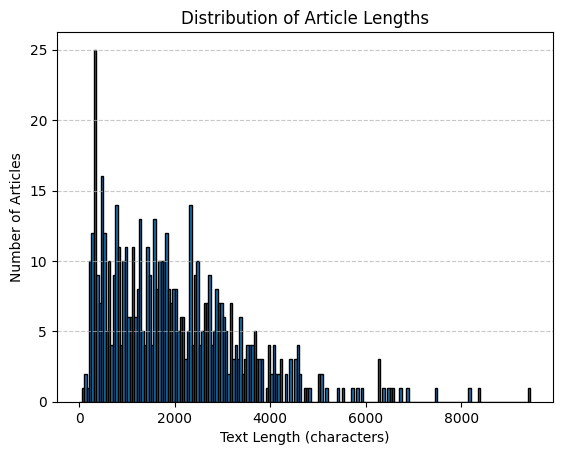

In [41]:
# Drop NaN values in 'filtered_text' column
df = df.dropna(subset=['filtered_text'])

# Calculate the length of each article in 'filtered_text'
df['text_length'] = df['filtered_text'].apply(len)

# Define bins for text lengths
bins = range(0, df['text_length'].max() + 50, 50)

# Create a histogram
plt.hist(df['text_length'], bins=bins, edgecolor='black')

# Customize the plot
plt.title('Distribution of Article Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [12]:
df.head()

,url,timestamp,processed_url_text,newspaper,arquivo_url,title,filtered_text,text_length,Lemmas_filtered,Lemmas_str,sentiment,sentiment_bin,sentiment_score,sentiment_label,published_date,year,entities,filtered_entities
0,https://www.cmjornal.pt/mundo/detalhe/andre-ve...,20210125190801,andre ventura apelidado de trump portugues na ...,cmjornal.pt/,https://arquivo.pt/noFrame/replay/202101251908...,"André Ventura apelidado de ""Trump português"" n...",Jornal francês destaca ascensão da extrema dir...,1928,"[jornal, francês, destacar, ascensão, extremo,...",jornal francês destacar ascensão extremo país ...,0.30,Slightly Positive,3.0,positive,2024-12-08 15:55:00,2021,"[('País', 'LOC'), ('Marcelo Rebelo de Sousa', ...","[('Le Parisien', 'PER'), ('André Ventura', 'PE..."
1,https://www.cmjornal.pt/politica/detalhe/debat...,20210120182636,debate tenso entre andre ventura e joao ferrei...,cmjornal.pt/,https://arquivo.pt/noFrame/replay/202101201826...,Debate tenso entre André Ventura e João Ferrei...,Os candidatos presidenciais João Ferreira e An...,3960,"[candidato, presidencial, joão, ferreira, prot...",candidato presidencial joão ferreira protagoni...,0.00,Neutral,1.0,positive,2021-01-20 00:00:00,2021,"[('João Ferreira', 'PER'), ('André Ventura', '...","[('João Ferreira', 'PER'), ('André Ventura', '..."
2,https://www.dn.pt/edicao-do-dia/01-jul-2021/ve...,20210701033951,ventura acusa familia coxi de inventar discrim...,dn.pt/,https://arquivo.pt/noFrame/replay/202107010339...,"Ventura acusa família Coxi de ""inventar discri...","Ventura acusa família Coxi de ""inventar discri...",394,"[acusar, família, coxi, inventar, discriminaçã...",acusar família coxi inventar discriminação aju...,0.00,Neutral,-3.0,negative,2021-07-01 00:00:00,2021,"[('Coxi', 'PER'), ('Chega', 'LOC'), ('Bairro d...","[('Coxi', 'PER')]"
3,https://www.dn.pt/edicao-do-dia/07-ago-2020/cr...,20200807084230,crianca negra cartaz em manifestacao do chega,dn.pt/,https://arquivo.pt/noFrame/replay/202008070842...,"Criança negra ""cartaz"" em manifestação do Chega","Criança negra ""cartaz"" em manifestação do Cheg...",346,"[criança, negro, cartaz, manifestação, menina,...",criança negro cartaz manifestação menina negro...,0.00,Neutral,-1.0,negative,2020-08-07 00:00:00,2020,"[('Chega\n\n', 'MISC'), ('Menina', 'PER'), ('C...","[('Menina', 'PER')]"
4,https://www.dn.pt/edicao-do-dia/08-out-2019/os...,20200207064445,os ciganos de alvito votaram no chega ha quem ...,dn.pt/,https://arquivo.pt/noFrame/replay/202002070644...,Os ciganos de Alvito votaram no Chega? Há quem...,Os ciganos de Alvito votaram no Chega? Há quem...,279,"[cigano, alvito, votar, digar, extrema-direita...",cigano alvito votar digar extrema-direita parl...,0.05,Slightly Positive,0.0,neutral,2020-02-07 00:00:00,2020,"[('Alvito', 'LOC'), ('Chega?', 'MISC'), ('Cheg...","[('André Ventura', 'PER')]"


#### The block of code below cannot run on JP's computer, and it's changed to markdown to avoid the error. GPU cannot be used for the modelling

In [ ]:
# ## DON'T RUN THIS CODE
# sentiment_pipeline = pipeline(
#     "sentiment-analysis",
#     model = "neuralmind/bert-base-portuguese-cased",
#     tokenizer = "neuralmind/bert-base-portuguese-cased",
#     truncation=True,  # Truncate sequences longer than the model's maximum
#     max_length=512,  # Limit the length of the input sequence
# )

# # Perform sentiment analysis
# df['sentiment'] = df.iloc[:5]['filtered_text'].apply(lambda x: sentiment_pipeline(x)[0]['label'])

# # Display results
# tools.display_dataframe_to_user(name="Portuguese News Article Sentiment Analysis", dataframe=df)

TF-IDF Matrix


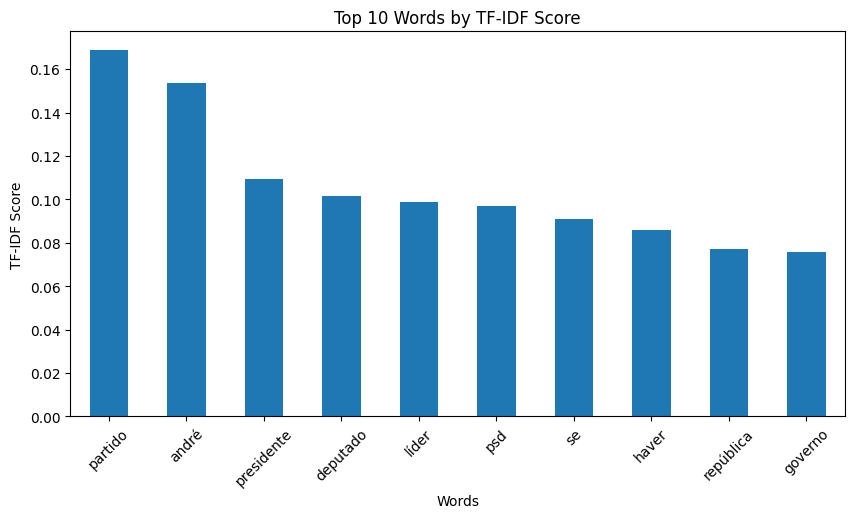

In [42]:
# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, max_df=0.8, max_features=50)

# Compute TF-IDF
tfidf_matrix = vectorizer.fit_transform(df['Lemmas_str'])

# Create a DataFrame to display the results
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=vectorizer.get_feature_names_out()
)

# Summarize TF-IDF scores
tfidf_mean = tfidf_df.mean(axis=0).sort_values(ascending=False)

tools.display_dataframe_to_user(name="TF-IDF Matrix", dataframe=tfidf_df)

# Plot the top 10 words by TF-IDF score
tfidf_mean.head(10).plot(kind='bar', figsize=(10, 5))
plt.title('Top 10 Words by TF-IDF Score')
plt.xlabel('Words')
plt.ylabel('TF-IDF Score')
plt.xticks(rotation=45)
plt.show()

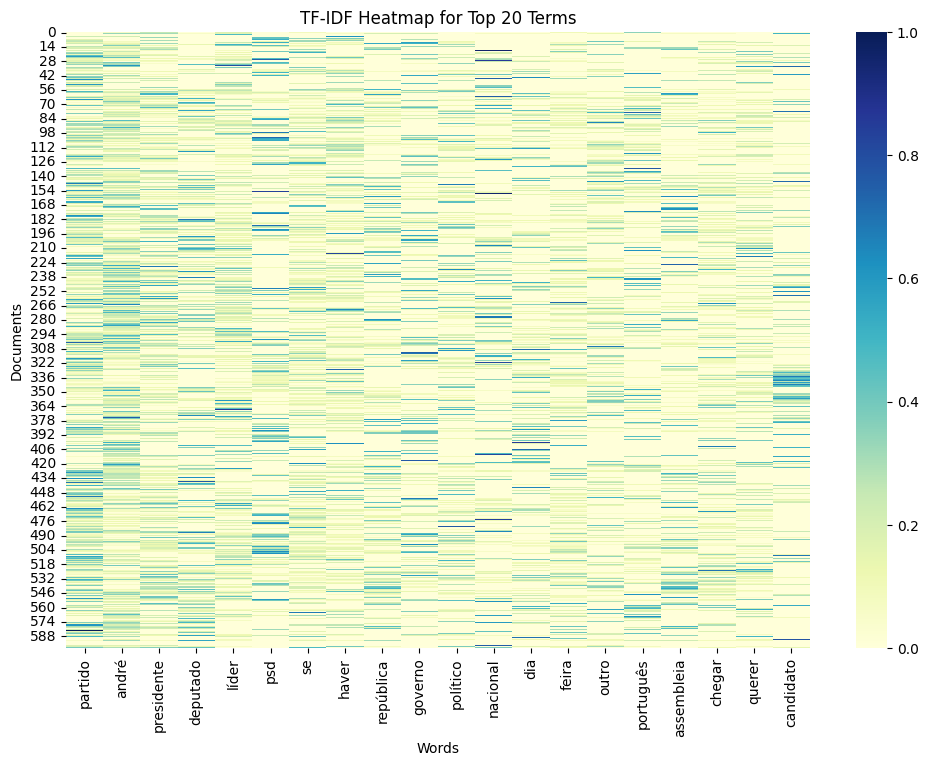

In [43]:
# Select the top 20 terms by mean TF-IDF score
top_terms = tfidf_mean.head(20).index
tfidf_top = tfidf_df[top_terms]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_top, annot=False, cmap='YlGnBu', cbar=True)
plt.title('TF-IDF Heatmap for Top 20 Terms')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()

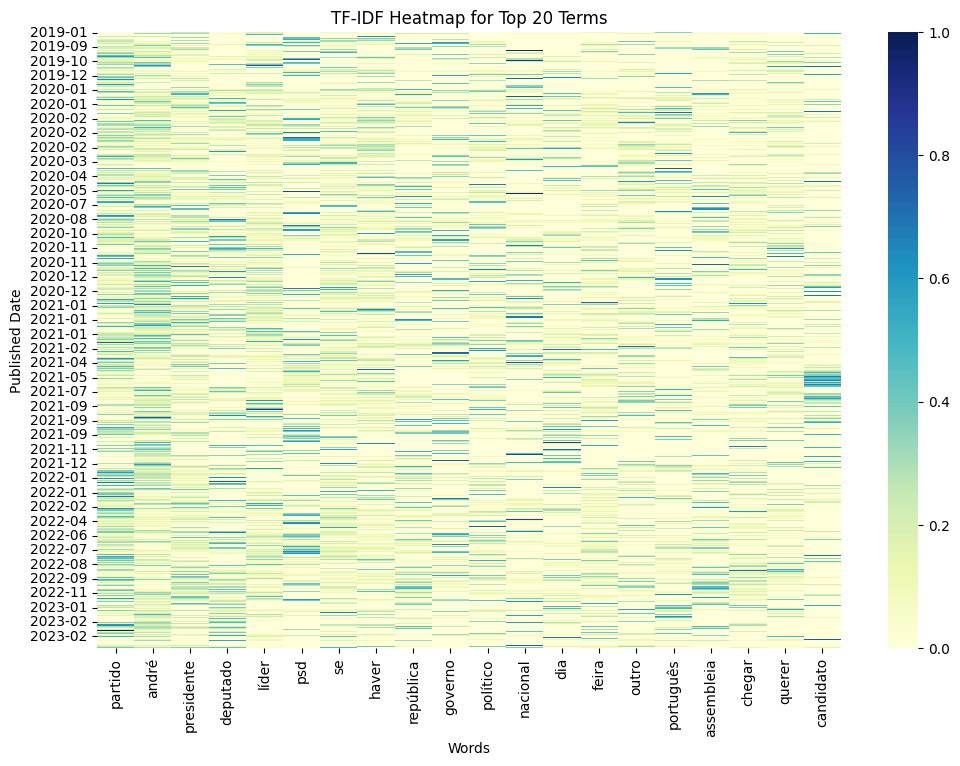

In [44]:
# Ensure the DataFrame has 'published_date' as a column
# Replace 'your_date_column' with the actual name of the column containing the published dates
tfidf_df['published_date'] = df['published_date']

tfidf_df['published_date'] = pd.to_datetime(tfidf_df['published_date'], errors='coerce')

tfidf_df = tfidf_df.sort_values(by='published_date')

# Check for any invalid dates and drop them if necessary
if tfidf_df['published_date'].isnull().any():
    print("Warning: Some dates were invalid and have been set to NaT.")
    tfidf_df = tfidf_df.dropna(subset=['published_date'])

tfidf_df['year_month'] = tfidf_df['published_date'].dt.to_period('M').astype(str)

# Set 'published_date' as the index for the heatmap
tfidf_top.index = tfidf_df['year_month']

# Plot heatmap with 'published_date' as the index
plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_top, annot=False, cmap='YlGnBu', cbar=True)
plt.title('TF-IDF Heatmap for Top 20 Terms')
plt.xlabel('Words')
plt.ylabel('Published Date')
plt.show()


In [45]:
from textblob import TextBlob

df['sentiment'] = df['filtered_text'].apply(lambda x: TextBlob(x).sentiment.polarity)



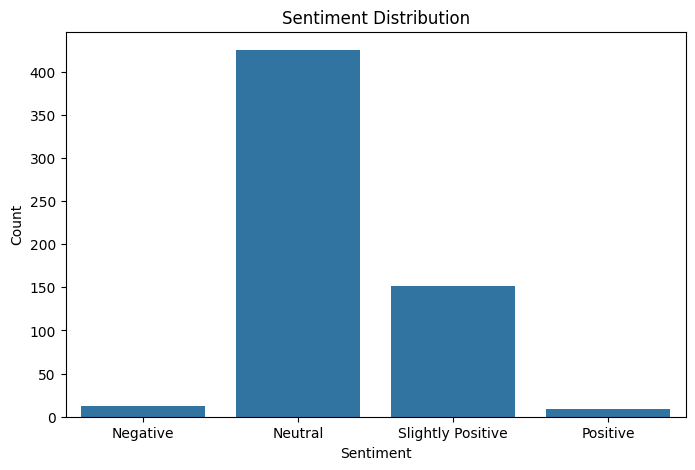

In [46]:
# Bin plotting of sentiment in df
bins = [-1, -0.5, 0, 0.5, 1]
labels = ['Negative', 'Neutral', 'Slightly Positive', 'Positive']
df['sentiment_bin'] = pd.cut(df['sentiment'], bins=bins, labels=labels)

# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_bin', data=df, order=labels)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_5851/4063062389.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


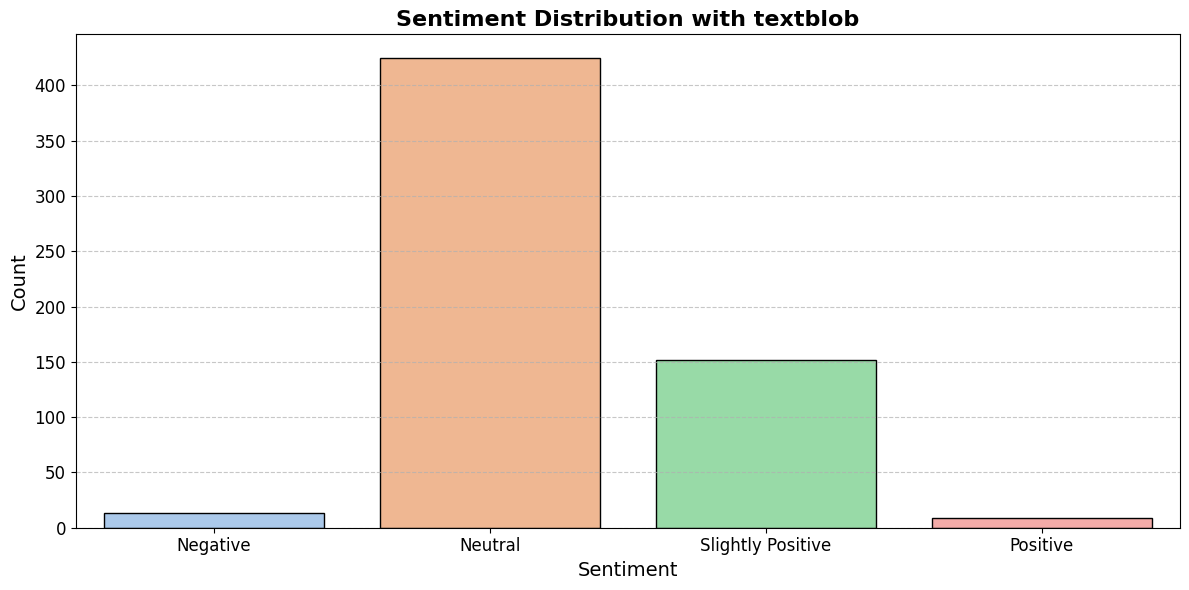

In [47]:
# Improved sentiment distribution plot with enhanced aesthetics
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.countplot(
    x='sentiment_bin',  # Specify the column to plot
    data=df, 
    palette='pastel',  # Use a pleasant pastel color palette
    edgecolor='black'  # Add borders to the bars
)

# Add titles and labels with improved formatting
plt.title('Sentiment Distribution with textblob', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize x-axis ticks
plt.xticks(fontsize=12, ha='center')  # Align labels for better readability
plt.yticks(fontsize=12)

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Apply a tight layout to prevent overlapping
plt.tight_layout()

plt.show()


In [48]:
# Define file path
file_path = '/Users/joaop.cardoso/MestradoCD/FCD/FDS_Project/SentiLex-lem-PT02.txt'

# Load the TXT file and split into 5 columns
sentilex_df = pd.read_csv(file_path, sep=';', header=None, names=['col1', 'col2', 'col3', 'col4', 'col5'], engine='python')

# Extract structured fields using regex
sentilex_df['word'] = sentilex_df['col1'].str.extract(r'^(.*?)\.')  # Extract word before "."
sentilex_df['PoS'] = sentilex_df['col1'].str.extract(r'PoS=(\w+)')  # Extract part of speech
sentilex_df['TG'] = sentilex_df['col2'].str.extract(r'TG=(.*?)$')   # Extract TG field
sentilex_df['POL_N0'] = sentilex_df['col3'].str.extract(r'POL:N0=([-]?\d+)')  # Extract POL:N0
sentilex_df['POL_N1'] = sentilex_df['col3'].str.extract(r'POL:N1=([-]?\d+)')  # Extract POL:N1
sentilex_df['ANOT'] = sentilex_df['col4'].str.extract(r'ANOT=(.*?)$')  # Extract ANOT field

# Drop original columns and retain structured data
structured_df = sentilex_df[['word', 'PoS', 'TG', 'POL_N0', 'POL_N1', 'ANOT']]

# Ensure that polarity columns are numeric and handle missing values
structured_df['POL_N0'] = pd.to_numeric(structured_df['POL_N0'], errors='coerce')
structured_df['POL_N1'] = pd.to_numeric(structured_df['POL_N1'], errors='coerce')

# Create a dictionary for fast lookups based on 'word' and polarity
# Example: Use POL_N0 as the primary polarity
sentilex_dict = structured_df.set_index('word')['POL_N0'].dropna().to_dict()

/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_5851/899917329.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  structured_df['POL_N0'] = pd.to_numeric(structured_df['POL_N0'], errors='coerce')
/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_5851/899917329.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  structured_df['POL_N1'] = pd.to_numeric(structured_df['POL_N1'], errors='coerce')


In [49]:
def analyze_sentiment(text, lexicon):
    tokens = re.findall(r'\b\w+\b', text.lower())  # Tokenize and lowercase
    sentiment = sum(lexicon.get(word, 0) for word in tokens)  # Sum word polarities
    return sentiment

# Apply sentiment analysis
df['sentiment_score'] = df['filtered_text'].apply(lambda x: analyze_sentiment(x, sentilex_dict))

# Assign sentiment label based on score
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
)



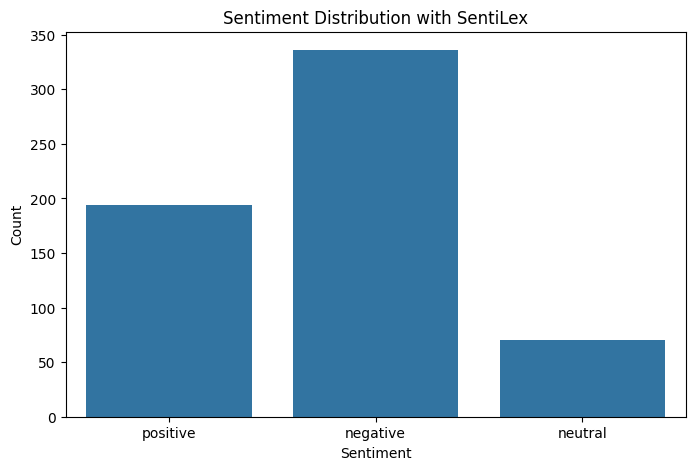

In [50]:
# Plot the sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_label', data=df)
plt.title('Sentiment Distribution with SentiLex')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_5851/3147640016.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


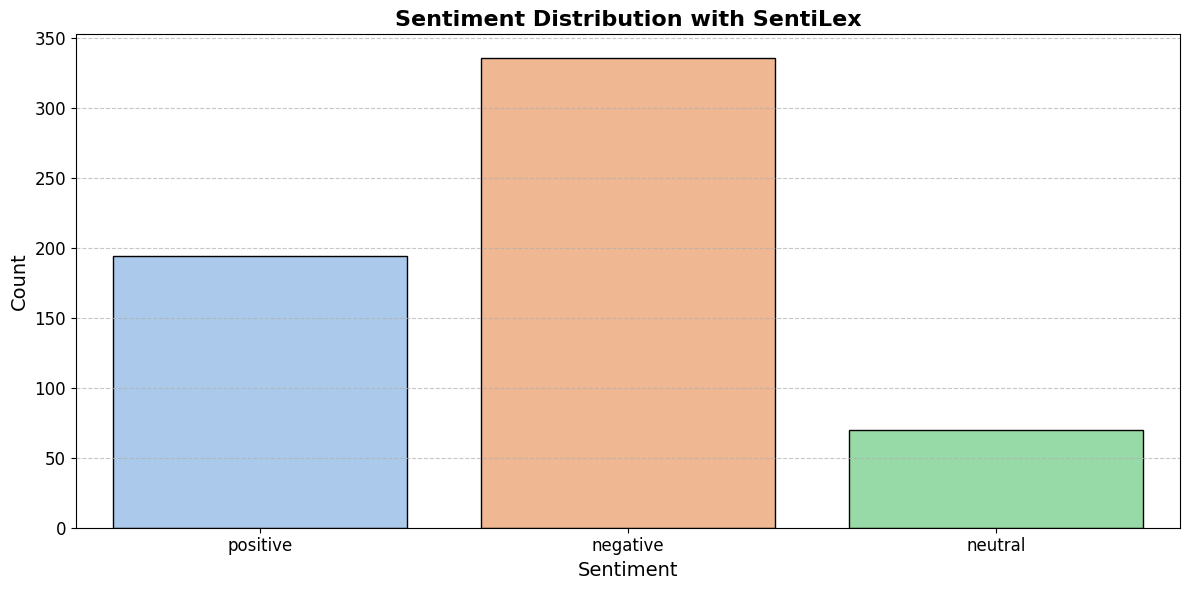

In [51]:
# Improved sentiment distribution plot with enhanced aesthetics
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.countplot(
    x='sentiment_label', 
    data=df, 
    palette='pastel',  # Use a pleasant pastel color palette
    edgecolor='black'  # Add borders to the bars
)

# Add titles and labels with improved formatting
plt.title('Sentiment Distribution with SentiLex', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customize x-axis ticks
plt.xticks(fontsize=12, ha='center')  # Align labels for better readability
plt.yticks(fontsize=12)

# Add horizontal gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Apply a tight layout to prevent overlapping
plt.tight_layout()

plt.show()


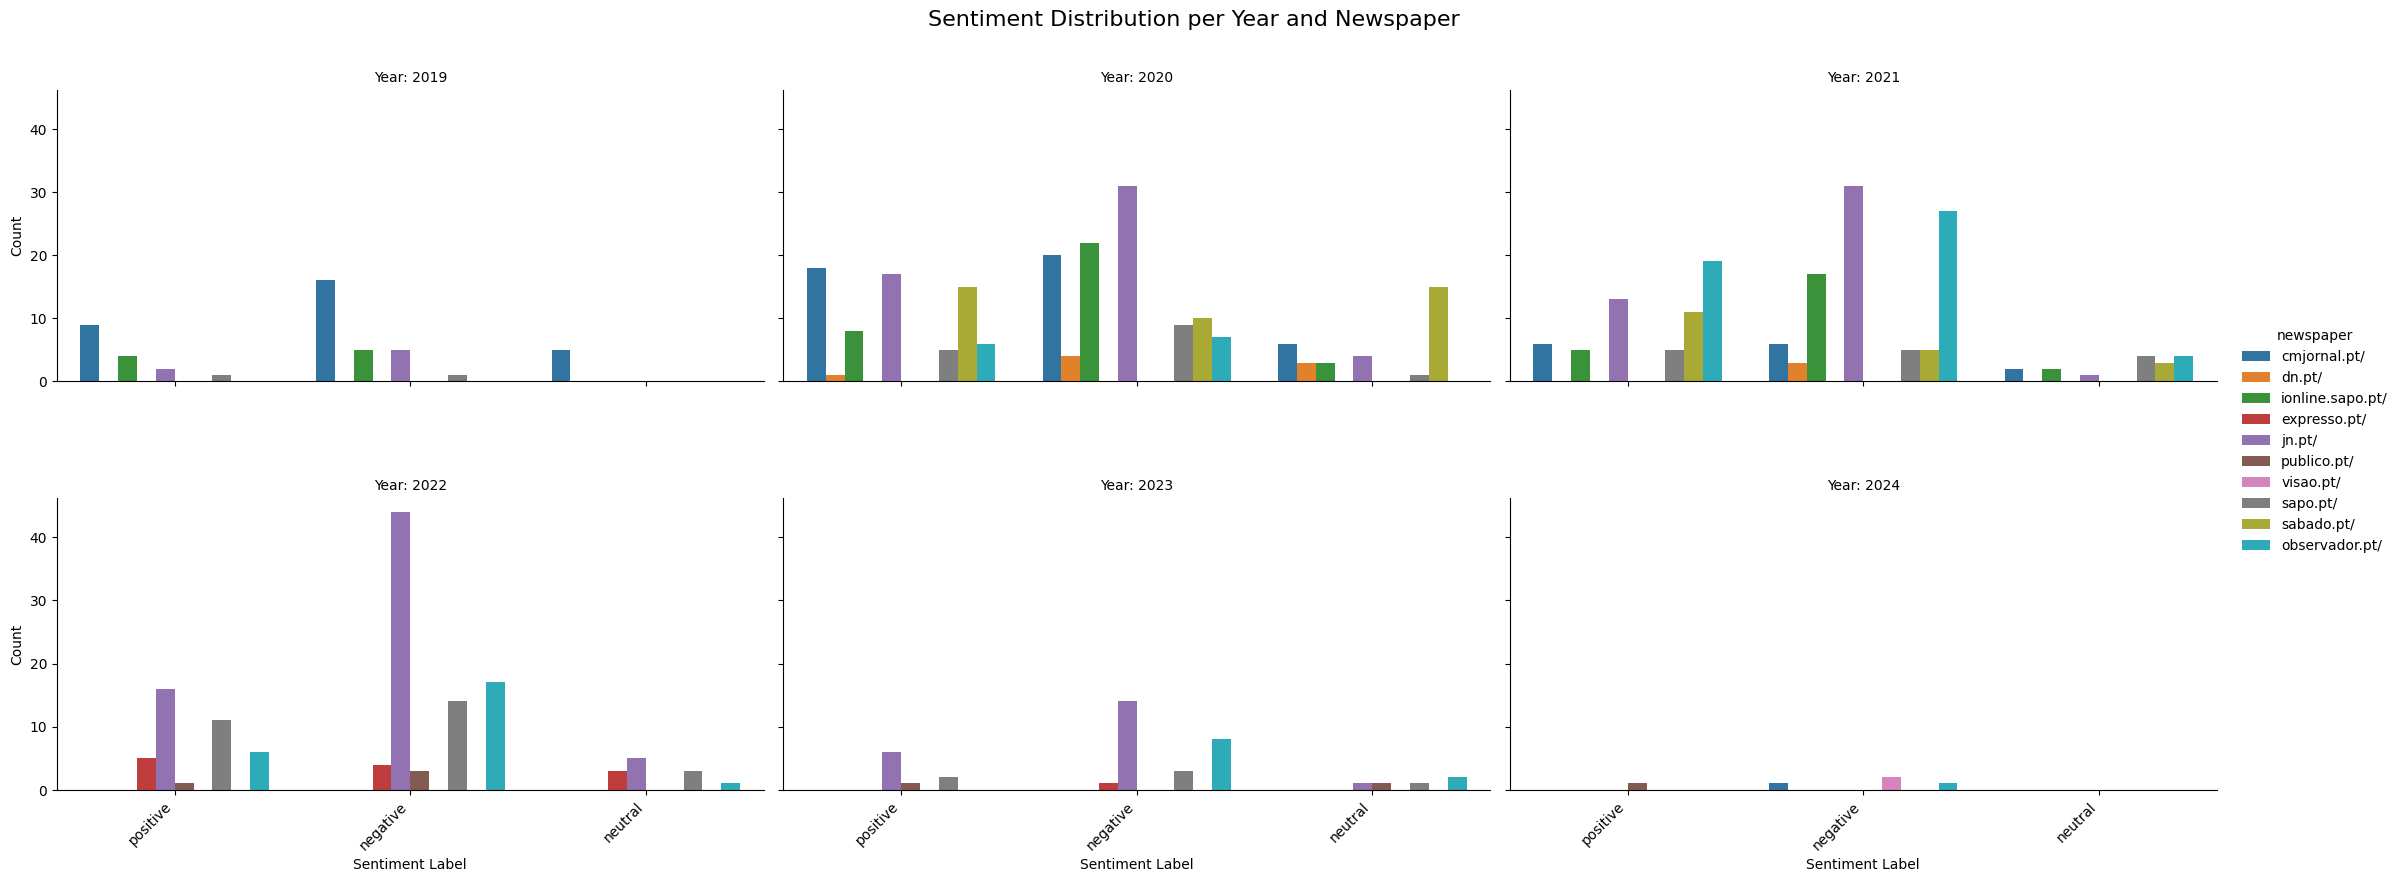

In [52]:
# Create a FacetGrid to plot sentiment distribution per year and per newspaper
g = sns.catplot(
    x='sentiment_label',
    hue='newspaper',
    col='year',
    data=df,
    kind='count',
    palette='tab10',
    height=5,
    aspect=1.5,
    col_wrap=3  # Wrap plots into 3 columns
)

# Adjust spacing to ensure x-axis labels are visible
g.figure.subplots_adjust(top=0.9, bottom=0.2, hspace=0.4)

# Set global x-axis label manually for visibility
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)  # Rotate x-axis labels
        label.set_horizontalalignment('right')  # Align labels properly

# Add titles and axis labels
g.figure.suptitle('Sentiment Distribution per Year and Newspaper', fontsize=16)
g.set_axis_labels('Sentiment Label', 'Count')
g.set_titles("Year: {col_name}")

plt.show()



#### Code to get the published date from meta data or span tag in html. 

It's important not to run this again. The dates that could not be retrieved (which were a lot of them9 were filled using the timestamp)

In [ ]:
## DON'T RUN THIS CODE
def extract_published_date(url):
    try:
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Extract published date from meta tags
        meta_date = soup.find('meta', {'property': 'article:published_time'}) or soup.find('meta', {'name': 'date'})
        if meta_date:
            return meta_date.get('content')
        
        # Extract visible date (if available)
        visible_date = soup.find('time') or soup.find('span', {'class': 'published-date'})
        if visible_date:
            return visible_date.text.strip()
        
        # Return a placeholder if no date is found
        return "Date Not Found"
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        return "Error"
    
# Apply the function to the DataFrame
df['published_date'] = df['arquivo_url'].apply(extract_published_date)
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')

In [53]:
# Export df to csv
df.to_csv('working_file_111224.csv', index=False)

In [54]:
# Load SpaCy's Portuguese model
nlp = spacy.load("pt_core_news_sm")

def extract_entities(text):
    """
    Extract named entities from the given text using SpaCy.
    """
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply the function to the DataFrame
df['entities'] = df['filtered_text'].apply(extract_entities)

df['filtered_entities'] = df['entities'].apply(
    lambda entity_list: [(text, label) for text, label in entity_list if label in {"PER", "ORG"}]
)

Despite the code below, I went through the csv file and removed the sentences in the scraped text that contained a lot of text that wasn't relevant, and were distorting our model and the statistics (things like titles from linked articles in the article to be scraped, the author's name, photographer and news agency that covered the article).

In [55]:
df['filtered_entities'] = df['filtered_entities'].apply( # Remove entities with 'foto' or 'lusa'
    lambda entities: [
        (text, label) for text, label in entities 
        if 'foto' not in text.lower() and 'lusa' not in text.lower()
    ]
)

def is_valid_person_name_spacy(name):
    """
    Use SpaCy to determine if a name follows common patterns for Portuguese names.
    """
    doc = nlp(name)
    # Check if all tokens are alphabetic and proper nouns
    return all(token.is_alpha and token.pos_ == "PROPN" for token in doc)

# Apply the function
df['filtered_entities'] = df['filtered_entities'].apply(
    lambda entities: [
        (text, label) for text, label in entities
        if label == "PER" and is_valid_person_name_spacy(text)
    ]
)


print(df['filtered_entities'])

0      [(Le Parisien, PER), (André Ventura, PER), (An...
1      [(João Ferreira, PER), (André Ventura, PER), (...
2                                          [(Coxi, PER)]
3                                        [(Menina, PER)]
4                                 [(André Ventura, PER)]
                             ...                        
595                                                   []
596                                                   []
597    [(Nuno Veiga, PER), (Nuno Veiga, PER), (André ...
598    [(Nuno Afonso, PER), (André Ventura, PER), (Ma...
599    [(Mithá Ribeiro, PER), (André Ventura, PER), (...
Name: filtered_entities, Length: 600, dtype: object


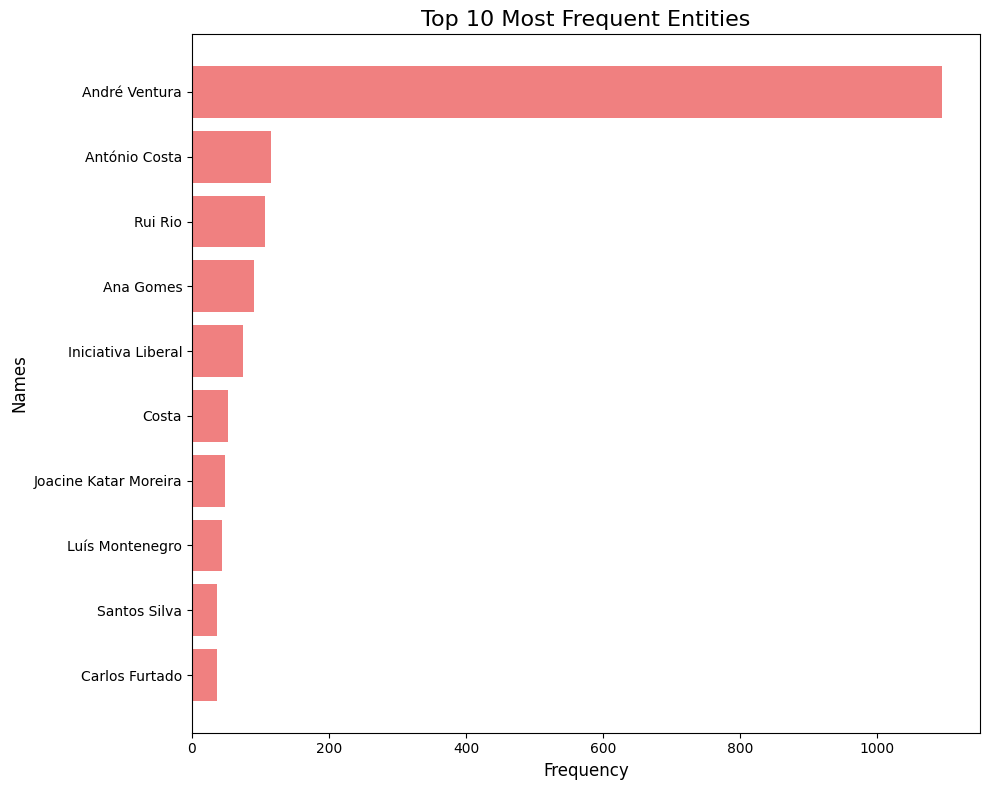

In [56]:
# Flatten the filtered_entities into a single list of names (discard labels for plotting)
all_names = [
    text for entities in df['filtered_entities'] for text, label in entities
]

# Count frequencies of each name
name_counts = Counter(all_names)


def plot_top_entities(entity_counts, top_n=10):
    """
    Plot only the top N entities by frequency.
    """
    # Get the top N entities
    sorted_entities = sorted(entity_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
    names, counts = zip(*sorted_entities)

    # Create horizontal bar plot
    plt.figure(figsize=(10, 8))
    plt.barh(names, counts, color="lightcoral")
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Names", fontsize=12)
    plt.title(f"Top {top_n} Most Frequent Entities", fontsize=16)
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

plot_top_entities(name_counts, top_n=10)

Top 20 Entities: [('André Ventura', 1095), ('António Costa', 168), ('Rui Rio', 107), ('Ana Gomes', 90), ('Augusto Santos Silva', 66), ('Joacine Katar Moreira', 48), ('Luís Montenegro', 44), ('Carlos Furtado', 37), ('Ferro Rodrigues', 36), ('Marisa Matias', 35), ('Maria Vieira', 31), ('João Ferreira', 28), ('Nuno Graciano', 28), ('Catarina Martins', 27), ('Pedro Pinto', 27), ('Rui Paulo Sousa', 24), ('Eduardo Cabrita', 23), ('Cristina Rodrigues', 22), ('Ana Catarina Mendes', 19), ('Rita Matias', 18)]


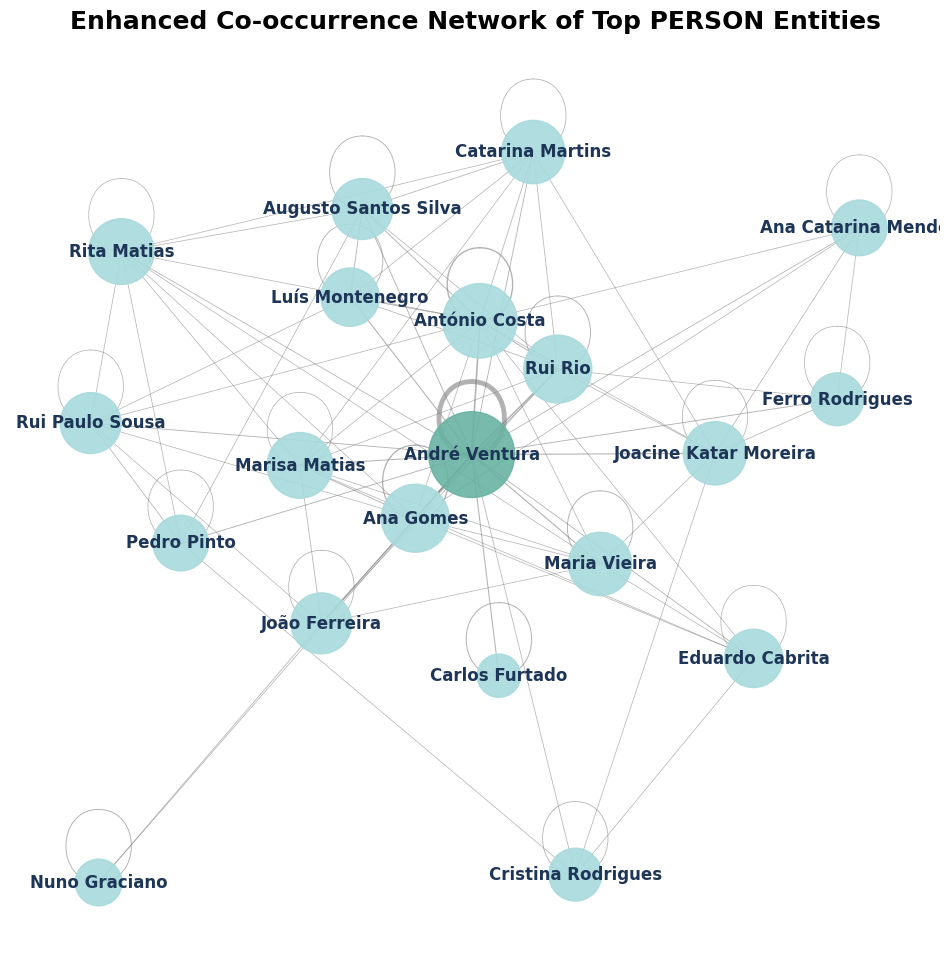

In [57]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

# Ensure 'filtered_entities' is a list-like structure
if isinstance(df['filtered_entities'].iloc[0], str):
    df['filtered_entities'] = df['filtered_entities'].apply(eval)

# Extract PERSON entities
df['filtered_persons'] = df['filtered_entities'].apply(
    lambda entities: [entity[0] for entity in entities if entity[1] == 'PER']
)

# Define a mapping for aliases
alias_mapping = {
    'Costa': 'António Costa',  # Map 'Costa' to 'António Costa'
    'Santos Silva': 'Augusto Santos Silva',  # Map 'Santos Silva' to 'Augusto Santos Silva'
    # Add other mappings as needed
}

# Function to replace aliases with canonical form
def standardize_entities(person_list, mapping):
    return [mapping.get(person, person) for person in person_list]

# Apply standardization to 'filtered_persons'
df['filtered_persons'] = df['filtered_persons'].apply(lambda persons: standardize_entities(persons, alias_mapping))

df['filtered_persons'] = df['filtered_persons'].apply(
    lambda persons: [person for person in persons if person not in ['Iniciativa Liberal', 'Liberdades', 'Garantias']]
)

# Flatten the list of persons and count frequencies
all_persons = [person for persons in df['filtered_persons'] for person in persons]
person_counts = Counter(all_persons)

# Print the top 20 most frequent PERSON entities
top_20_persons = person_counts.most_common(20)
print("Top 20 Entities:", top_20_persons)

# Use top 20 entities to filter nodes
top_20_persons_list = [person for person, _ in top_20_persons]

# Initialize and build the graph
G = nx.Graph()

for persons in df['filtered_persons']:
    filtered = [person for person in persons if person in top_20_persons_list]
    for pair in combinations(filtered, 2):  # Pair entities in the same article
        if G.has_edge(*pair):
            G.edges[pair]['weight'] += 1
        else:
            G.add_edge(*pair, weight=1)

# Simplify the graph by filtering edges with weight > threshold
edge_weight_threshold = 1  # Adjust this threshold to control density
filtered_edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['weight'] > edge_weight_threshold]
H = nx.Graph()  # Create a new subgraph with filtered edges
H.add_edges_from(filtered_edges)

# Extract only the nodes that are part of the filtered edges
nodes_in_filtered_edges = set([u for u, v, d in filtered_edges] + [v for u, v, d in filtered_edges])
H = H.subgraph(nodes_in_filtered_edges)

# Compute centrality metrics for the filtered graph
degree_centrality = nx.degree_centrality(H)
betweenness_centrality = nx.betweenness_centrality(H)

# Add attributes to nodes
nx.set_node_attributes(H, degree_centrality, 'degree_centrality')
nx.set_node_attributes(H, betweenness_centrality, 'betweenness_centrality')

# Normalize edge widths for clarity
max_weight = max([H[u][v]['weight'] for u, v in H.edges]) if H.edges else 1
edge_widths = [0.5 + (H[u][v]['weight'] / max_weight) * 2 for u, v in H.edges]  # Scale between 0.5 and 2.5

# Visualize the simplified graph
# Enhanced visualization
plt.figure(figsize=(12, 12))

# Improved layout
pos = nx.spring_layout(H, seed=42, k=0.3)  # Adjust 'k' for node spacing

# Normalize edge widths for clarity
max_weight = max([H[u][v]['weight'] for u, v in H.edges]) if H.edges else 1
edge_widths = [0.5 + (H[u][v]['weight'] / max_weight) * 3 for u, v in H.edges]  # Scale between 0.5 and 3

# Node sizes based on degree centrality
node_sizes = [500 + (degree_centrality[node] * 3000) for node in H.nodes]

# Custom colors for nodes
node_colors = ['#69b3a2' if node == 'André Ventura' else '#a8dadc' for node in H.nodes]

# Draw nodes
nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)

# Draw edges
nx.draw_networkx_edges(H, pos, width=edge_widths, edge_color="gray", alpha=0.6)

# Draw labels with better font size
nx.draw_networkx_labels(H, pos, font_size=12, font_weight="bold", font_color="#1d3557")

# Add a title with larger font
plt.title("Enhanced Co-occurrence Network of Top PERSON Entities", fontsize=18, fontweight="bold")

# Remove axes for a cleaner look
plt.axis("off")
plt.show()




/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_5851/2750045777.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('cividis')  # Use a colorful colormap


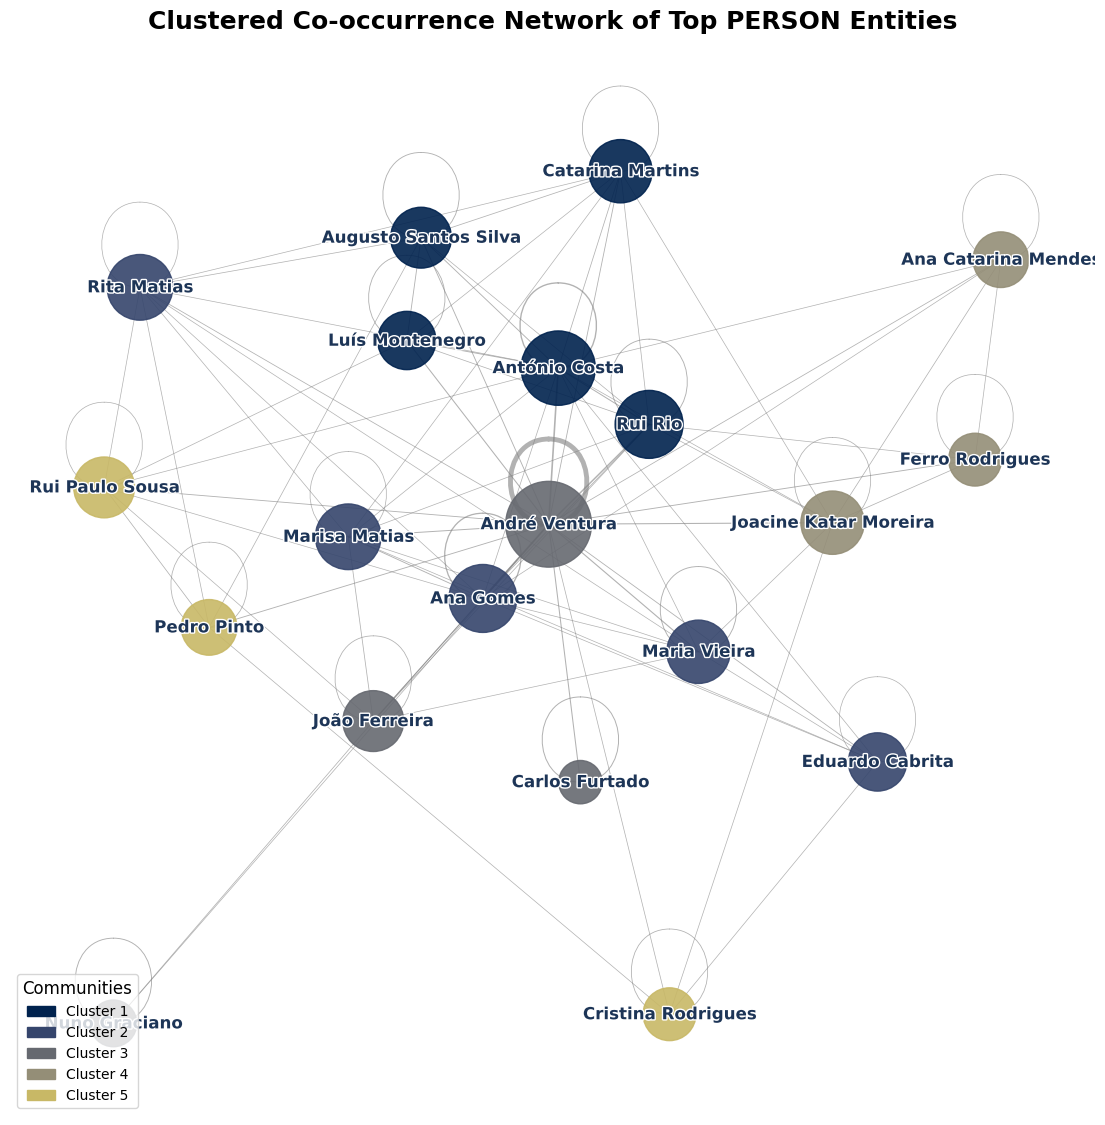

In [60]:
import matplotlib.patches as mpatches
import matplotlib.patheffects as pe
from matplotlib import colors
# Enhanced visualization with clusters and gradients
plt.figure(figsize=(14, 14))

# Improved layout with clusters in mind
pos = nx.spring_layout(H, seed=42, k=0.3)  # Adjust 'k' for node spacing

# Normalize edge widths for clarity
max_weight = max([H[u][v]['weight'] for u, v in H.edges]) if H.edges else 1
edge_widths = [0.5 + (H[u][v]['weight'] / max_weight) * 3 for u, v in H.edges]  # Scale between 0.5 and 3

# Node sizes based on degree centrality
node_sizes = [500 + (degree_centrality[node] * 3000) for node in H.nodes]

# Generate clusters (communities) using Louvain or Girvan-Newman
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(H))

# Assign colors to clusters
cmap = cm.get_cmap('cividis')  # Use a colorful colormap
cluster_colors = {node: cmap(i / len(communities)) for i, community in enumerate(communities) for node in community}

# Draw nodes with cluster-based coloring
nx.draw_networkx_nodes(
    H, pos, 
    node_size=node_sizes, 
    node_color=[colors.rgb2hex(cluster_colors[node]) for node in H.nodes], 
    alpha=0.9
)

# Draw edges
nx.draw_networkx_edges(H, pos, width=edge_widths, edge_color="gray", alpha=0.6)

# Draw labels with white contour
labels = {node: node for node in H.nodes}
text_items = nx.draw_networkx_labels(H, pos, labels, font_size=12, font_weight="bold", font_color="#1d3557")
for text in text_items.values():
    text.set_path_effects([
        pe.Stroke(linewidth=2, foreground='white'),  # White outline
        pe.Normal()
    ])

# Add a title with larger font
plt.title("Clustered Co-occurrence Network of Top PERSON Entities", fontsize=18, fontweight="bold")

# Add a manual legend for clusters
handles = [mpatches.Patch(color=cmap(i / len(communities)), label=f'Cluster {i+1}') for i in range(len(communities))]
plt.legend(handles=handles, loc='lower left', fontsize=10, title="Communities", title_fontsize=12)

# Remove axes for a cleaner look
plt.axis("off")
plt.show()


#### LDA (Latent Dirichlet Allocation) is a type of topic modelling
It is used to find the topics that are present in a corpus of text. It is a generative probabilistic model that assumes that each document is a mixture of a small number of topics and that each word's presence is attributable to one of the document's topics.

/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_5851/3860069405.py:13: RuntimeWarning: divide by zero encountered in scalar power
  return B * (x**(alpha[0] - 1)) * (y**(alpha[1] - 1)) * (z**(alpha[2] - 1))


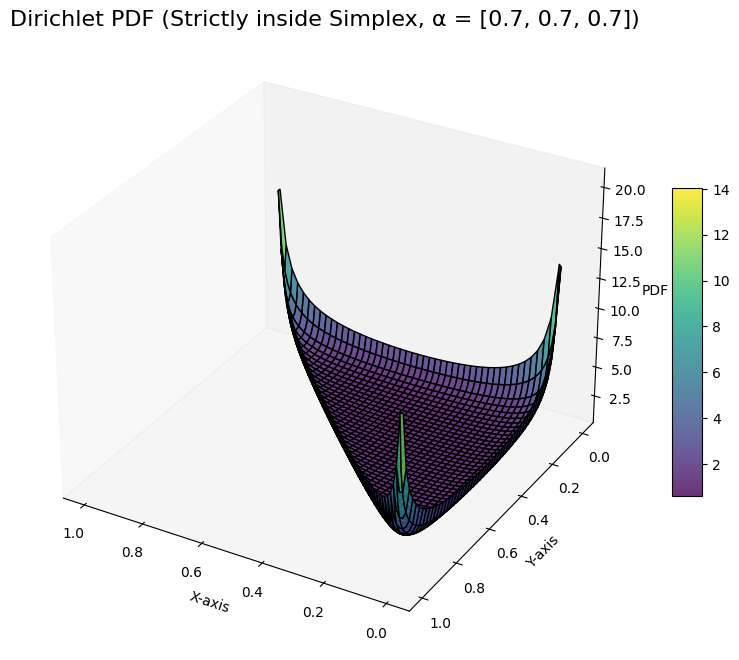

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.special import gamma

# Define the Dirichlet PDF function
def dirichlet_pdf_fixed(x, y, alpha):
    z = 1 - x - y
    if z < 0 or x < 0 or y < 0:
        return 0  # Outside the simplex
    else:
        B = gamma(np.sum(alpha)) / np.prod([gamma(a) for a in alpha])
        return B * (x**(alpha[0] - 1)) * (y**(alpha[1] - 1)) * (z**(alpha[2] - 1))

# Parameters for the Dirichlet distribution
alpha = [0.4, 0.4, 0.4]

# Generate a grid for x and y
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

# Calculate Z values (Dirichlet PDF) strictly within the simplex
Z_fixed_clean = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_val = X[i, j]
        y_val = Y[i, j]
        z_val = 1 - x_val - y_val  # Enforce simplex condition
        if z_val >= 0:  # Ensure inside the simplex
            Z_fixed_clean[i, j] = dirichlet_pdf_fixed(x_val, y_val, alpha)
        else:
            Z_fixed_clean[i, j] = np.nan  # Outside the simplex

# Plot the corrected surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot
surf = ax.plot_surface(X, Y, Z_fixed_clean, cmap=cm.viridis, edgecolor='k', alpha=0.8)

# Add labels and title
ax.set_title("Dirichlet PDF (Strictly inside Simplex, α = [0.7, 0.7, 0.7])", fontsize=16)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("PDF")
ax.view_init(elev=30, azim=120)  # Adjust view angle
ax.grid(False)

# Add color bar for the surface
fig.colorbar(surf, shrink=0.5, aspect=10)

plt.show()


In [62]:
import ast

df['Lemmas_filtered'] = df['Lemmas_filtered'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Use Lemmas_filtered as is (already tokenized)
dictionary = Dictionary(df['Lemmas_filtered'])
dictionary.filter_extremes(no_below=10, no_above=0.5)  # Filter out infrequent and very frequent words

corpus = [dictionary.doc2bow(text) for text in df['Lemmas_filtered']]


In [21]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd

# Define a range of topics and passes to test
topic_range = range(2, 11)  # Test between 2 and 10 topics
passes_range = [5, 10, 15]  # Test 5, 10, and 15 passes

# Initialize variables to store the best model and coherence score
best_model = None
best_coherence = -1
best_topics = 0
best_passes = 0

# Dictionary to store results for analysis
results = []

# Test combinations of topics and passes
for num_topics in topic_range:
    for passes in passes_range:
        print(f"Training LDA with {num_topics} topics and {passes} passes...")
        
        # Train LDA model
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes, random_state=42)
        
        # Compute coherence score
        coherence_model = CoherenceModel(model=lda_model, texts=df['Lemmas_filtered'], dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        
        # Save results
        results.append({"num_topics": num_topics, "passes": passes, "coherence_score": coherence_score})
        
        # Check if this is the best model so far
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_model = lda_model
            best_topics = num_topics
            best_passes = passes

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Print the best model configuration
print(f"\nBest Model: {best_topics} topics, {best_passes} passes")
print(f"Highest Coherence Score: {best_coherence}")

# Save results to a file if desired
results_df.sort_values(by="coherence_score", ascending=False, inplace=True)

# Display the results to the user
tools.display_dataframe_to_user(name="LDA Coherence Score Results", dataframe=results_df)

# The `best_model` variable holds the LDA model with the highest coherence score
best_model.save("best_lda_model")  # Save the best model if needed


Training LDA with 2 topics and 5 passes...
Training LDA with 2 topics and 10 passes...
Training LDA with 2 topics and 15 passes...
Training LDA with 3 topics and 5 passes...
Training LDA with 3 topics and 10 passes...
Training LDA with 3 topics and 15 passes...
Training LDA with 4 topics and 5 passes...
Training LDA with 4 topics and 10 passes...
Training LDA with 4 topics and 15 passes...
Training LDA with 5 topics and 5 passes...
Training LDA with 5 topics and 10 passes...
Training LDA with 5 topics and 15 passes...
Training LDA with 6 topics and 5 passes...
Training LDA with 6 topics and 10 passes...
Training LDA with 6 topics and 15 passes...
Training LDA with 7 topics and 5 passes...
Training LDA with 7 topics and 10 passes...
Training LDA with 7 topics and 15 passes...
Training LDA with 8 topics and 5 passes...
Training LDA with 8 topics and 10 passes...
Training LDA with 8 topics and 15 passes...
Training LDA with 9 topics and 5 passes...
Training LDA with 9 topics and 10 passes

In [24]:
# Print the top words for each topic
topic_best_model = best_model.print_topics(num_words=10)
for topic in topic_best_model:
    print(f"Topic {topic[0]}: {topic[1]}")

Topic 0: 0.032*"psd" + 0.020*"governo" + 0.012*"político" + 0.012*"ps" + 0.010*"costa" + 0.010*"rio" + 0.010*"açores" + 0.009*"acordo" + 0.008*"afirmar" + 0.008*"chegar"
Topic 1: 0.017*"rodrigues" + 0.014*"república" + 0.014*"proposta" + 0.013*"assembleia" + 0.011*"constitucional" + 0.011*"voto" + 0.010*"projeto" + 0.010*"cds" + 0.010*"pena" + 0.010*"comissão"
Topic 2: 0.020*"parlamentar" + 0.012*"político" + 0.011*"assembleia" + 0.010*"deputada" + 0.010*"joacine" + 0.010*"parlamento" + 0.009*"república" + 0.008*"origem" + 0.008*"país" + 0.008*"declaração"
Topic 3: 0.030*"nacional" + 0.019*"militante" + 0.015*"direção" + 0.015*"convenção" + 0.014*"congresso" + 0.009*"eleição" + 0.008*"dia" + 0.008*"político" + 0.008*"interno" + 0.007*"mesa"
Topic 4: 0.017*"república" + 0.012*"assembleia" + 0.011*"português" + 0.011*"saúde" + 0.009*"projeto" + 0.009*"portugal" + 0.009*"dever" + 0.009*"hoje" + 0.008*"lei" + 0.008*"dia"
Topic 5: 0.013*"lisboa" + 0.012*"tribunal" + 0.011*"lista" + 0.011*"c

In [ ]:
from gensim.models import LdaModel, TfidfModel
from gensim.corpora import Dictionary
# Step 1: Preprocessing and dictionary creation
# Assuming df['Lemmas_filtered'] contains preprocessed tokenized articles
dictionary2 = Dictionary(df['Lemmas_filtered'])
dictionary2.filter_extremes(no_below=5, no_above=0.5)  # Remove rare and overly common words

# Create the Bag-of-Words corpus
corpus_bow = [dictionary2.doc2bow(doc) for doc in df['Lemmas_filtered']]

# Step 2: Apply TF-IDF
tfidf_model = TfidfModel(corpus_bow, dictionary=dictionary2)
corpus_tfidf = tfidf_model[corpus_bow]

# Check size of dictionary and corpus
print(f"Size of dictionary: {len(dictionary2)}")
print(f"Number of documents in corpus: {len(corpus_bow)}")

# Step 3: Train LDA Model using TF-IDF weighted corpus
num_topics = 7  # Example: Start with 5 topics
lda_model_tfidf = LdaModel(corpus=corpus_tfidf, id2word=dictionary2, num_topics=num_topics, passes=15, random_state=42)

# Step 4: Evaluate coherence
coherence_model_tfidf = CoherenceModel(model=lda_model_tfidf, texts=df['Lemmas_filtered'], dictionary=dictionary2, coherence='c_v')
coherence_score_tfidf = coherence_model_tfidf.get_coherence()

# Display coherence score
print(f"Coherence Score with TF-IDF: {coherence_score_tfidf}")

# Step 5: Print topics
for idx, topic in lda_model_tfidf.print_topics(num_topics=num_topics, num_words=10):
    print(f"Topic {idx}: {topic}")

In [64]:
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pandas as pd

# Define a range of topics and passes to test
topic_range = range(2, 11)  # Test between 2 and 10 topics
passes_range = [5, 10, 15]  # Test 5, 10, and 15 passes

# Initialize variables to store the best model and coherence score
best_model = None
best_coherence = -1
best_topics = 0
best_passes = 0

# Dictionary to store results for analysis
results = []

# Test combinations of topics and passes
for num_topics in topic_range:
    for passes in passes_range:
        print(f"Training LDA with {num_topics} topics and {passes} passes...")
        
        # Train LDA model
        lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary2, num_topics=num_topics, passes=passes, random_state=42)
        
        # Compute coherence score
        coherence_model = CoherenceModel(model=lda_model, texts=df['Lemmas_filtered'], dictionary=dictionary2, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        
        # Save results
        results.append({"num_topics": num_topics, "passes": passes, "coherence_score": coherence_score})
        
        # Check if this is the best model so far
        if coherence_score > best_coherence:
            best_coherence = coherence_score
            best_model = lda_model
            best_topics = num_topics
            best_passes = passes

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Print the best model configuration
print(f"\nBest Model: {best_topics} topics, {best_passes} passes")
print(f"Highest Coherence Score: {best_coherence}")

# Save results to a file if desired
results_df.sort_values(by="coherence_score", ascending=False, inplace=True)

# Display the results to the user
tools.display_dataframe_to_user(name="LDA Coherence Score Results", dataframe=results_df)

# The `best_model` variable holds the LDA model with the highest coherence score
best_model.save("best_lda_model")  # Save the best model if needed


Training LDA with 2 topics and 5 passes...


Training LDA with 2 topics and 10 passes...
Training LDA with 2 topics and 15 passes...
Training LDA with 3 topics and 5 passes...
Training LDA with 3 topics and 10 passes...
Training LDA with 3 topics and 15 passes...
Training LDA with 4 topics and 5 passes...
Training LDA with 4 topics and 10 passes...
Training LDA with 4 topics and 15 passes...
Training LDA with 5 topics and 5 passes...
Training LDA with 5 topics and 10 passes...
Training LDA with 5 topics and 15 passes...
Training LDA with 6 topics and 5 passes...
Training LDA with 6 topics and 10 passes...
Training LDA with 6 topics and 15 passes...
Training LDA with 7 topics and 5 passes...
Training LDA with 7 topics and 10 passes...
Training LDA with 7 topics and 15 passes...
Training LDA with 8 topics and 5 passes...
Training LDA with 8 topics and 10 passes...
Training LDA with 8 topics and 15 passes...
Training LDA with 9 topics and 5 passes...
Training LDA with 9 topics and 10 passes...
Training LDA with 9 topics and 15 passe

In [65]:
# Print the top words for each topic
topics_best_model_refined = best_model.print_topics(num_words=10)
for topic in topics_best_model_refined:
    print(f"Topic {topic[0]}: {topic[1]}")

Topic 0: 0.007*"benfica" + 0.005*"específico" + 0.004*"confinamento" + 0.004*"carta" + 0.003*"jogador" + 0.003*"nacionalidade" + 0.003*"animal" + 0.003*"regionalização" + 0.003*"pereira" + 0.003*"cigano"
Topic 1: 0.004*"marine" + 0.004*"freguesia" + 0.004*"le" + 0.004*"pen" + 0.003*"sns" + 0.003*"residência" + 0.003*"cidade" + 0.003*"desfile" + 0.003*"saudação" + 0.003*"tensão"
Topic 2: 0.005*"vieira" + 0.005*"maria" + 0.003*"favoravelmente" + 0.003*"mostrar se" + 0.002*"confiante" + 0.002*"estranho" + 0.002*"identificar" + 0.002*"emigrante" + 0.002*"candidatura" + 0.002*"pnr"
Topic 3: 0.011*"joacine" + 0.007*"origem" + 0.006*"katar" + 0.006*"devolver" + 0.005*"livre" + 0.005*"condenação" + 0.005*"moreira" + 0.004*"inadmissível" + 0.004*"património" + 0.004*"museu"
Topic 4: 0.004*"psd" + 0.003*"deputado" + 0.003*"nacional" + 0.003*"político" + 0.003*"assembleia" + 0.003*"português" + 0.003*"haver" + 0.003*"governo" + 0.003*"parlamentar" + 0.003*"voto"
Topic 5: 0.005*"brilhante" + 0.005

In [38]:
# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=10, random_state=42) # LDA model with 5 topics

# Print the top words for each topic
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")

Topic 0: 0.026*"psd" + 0.016*"governo" + 0.010*"político" + 0.010*"ps" + 0.008*"costa" + 0.008*"rio" + 0.008*"afirmar" + 0.008*"chegar" + 0.007*"acordo" + 0.007*"açores"
Topic 1: 0.013*"voto" + 0.012*"eleição" + 0.010*"rodrigues" + 0.010*"república" + 0.008*"assembleia" + 0.008*"cds" + 0.008*"psd" + 0.008*"constitucional" + 0.008*"nacional" + 0.007*"ano"
Topic 2: 0.016*"parlamentar" + 0.011*"político" + 0.009*"assembleia" + 0.009*"república" + 0.009*"parlamento" + 0.009*"deputada" + 0.008*"joacine" + 0.008*"cigano" + 0.007*"declaração" + 0.007*"país"
Topic 3: 0.018*"nacional" + 0.013*"militante" + 0.010*"convenção" + 0.009*"congresso" + 0.009*"direção" + 0.008*"político" + 0.008*"dia" + 0.008*"chegar" + 0.007*"tribunal" + 0.006*"eleição"
Topic 4: 0.014*"república" + 0.012*"português" + 0.012*"marcelo" + 0.009*"candidato" + 0.009*"outro" + 0.009*"presidencial" + 0.008*"portugal" + 0.008*"rebelo" + 0.007*"sousa" + 0.007*"dia"


In [39]:
# Define the topic labels
topic_labels = {
    0: "Political Leadership and Party Governance [0]",
    1: "Elections and Constitutional Framework [1]",
    2: "Parliamentary Politics and Minority Representation [2]",
    3: "Party Conventions and Internal Dynamics [3]",
    4: "Presidential Elections and National Identity [4]",
}

# Function to assign labels based on the topic
def assign_topic_label(topic_id):
    return topic_labels.get(topic_id, "Unknown Topic")

# Get the dominant topic for each document and assign the label
document_topics = [max(lda_model.get_document_topics(doc), key=lambda x: x[1])[0] for doc in corpus]
df['dominant_topic'] = document_topics
df['topic_label'] = df['dominant_topic'].apply(assign_topic_label)

topic_frequency = pd.DataFrame(document_topics, columns=["dominant_topic"])

topic_frequency["topic_label"] = topic_frequency["dominant_topic"].map(topic_labels)

# Compute the frequency of each topic

topic_frequency_count = topic_frequency["topic_label"].value_counts().reset_index()

topic_frequency_count.columns = ["Topic", "Frequency"]

tools.display_dataframe_to_user(name="Topic Frequency in Dataset", dataframe=topic_frequency_count)

Topic Frequency in Dataset


In [43]:
from gensim.models.coherencemodel import CoherenceModel

# Compute coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df['Lemmas_filtered'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.4008711416263136


In [50]:
# Prepare the pyLDAvis visualization
pyLDAvis.enable_notebook()  # For Jupyter Notebook; omit for scripts
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_vis)

# Save the visualization as an HTML file
pyLDAvis.save_html(lda_vis, "lda_visualization.html")

/opt/anaconda3/envs/masters/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=4841) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/masters/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=4841) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/masters/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=4841) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/masters/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=4841) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/envs/masters/lib/python3.12/site-packages/job

<Axes: xlabel='year'>

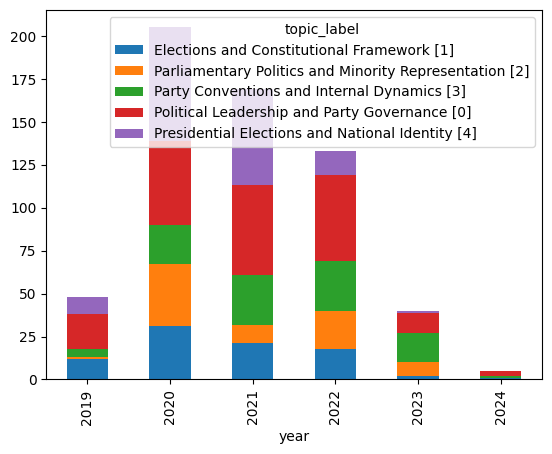

In [42]:
topic_trends = df.groupby(['year', 'topic_label']).size().unstack(fill_value=0)
topic_trends.plot(kind='bar', stacked=True)

<Figure size 1200x800 with 0 Axes>

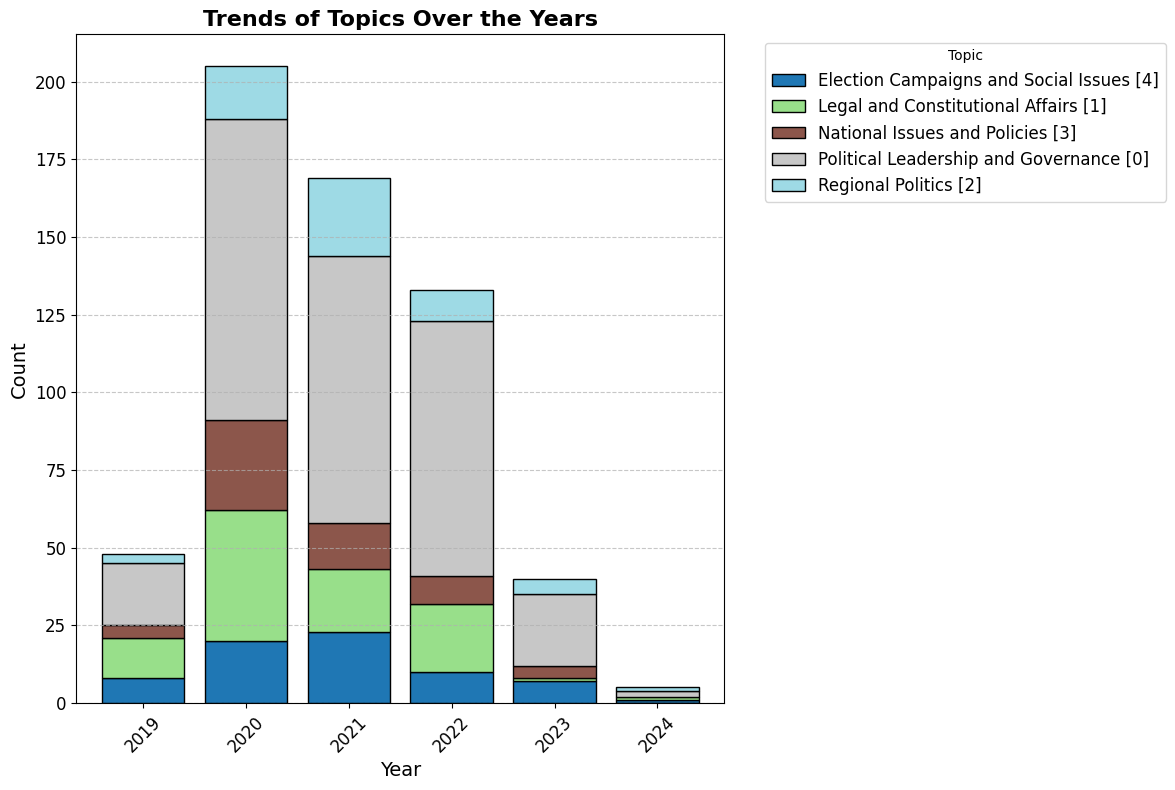

In [ ]:
# Group data and create a stacked bar plot
topic_trends = df.groupby(['year', 'topic_label']).size().unstack(fill_value=0)

# Plot with improved aesthetics
plt.figure(figsize=(12, 8))
topic_trends.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='tab20',  # Use a visually distinct colormap
    edgecolor='black',  # Add borders to the bars
    width=0.8  # Adjust bar width for better spacing
)

# Add titles and labels
plt.title('Trends of Topics Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate and adjust x-axis labels
plt.yticks(fontsize=12)

# Add a legend outside the plot for clarity
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for spacing
plt.tight_layout()

plt.show()


<Axes: xlabel='newspaper'>

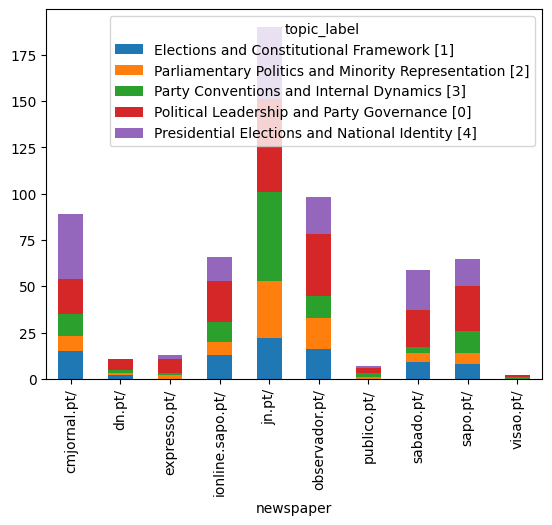

In [41]:
topic_by_source = df.groupby(['newspaper', 'topic_label']).size().unstack(fill_value=0)

topic_by_source.plot(kind='bar', stacked=True)


<Figure size 1200x800 with 0 Axes>

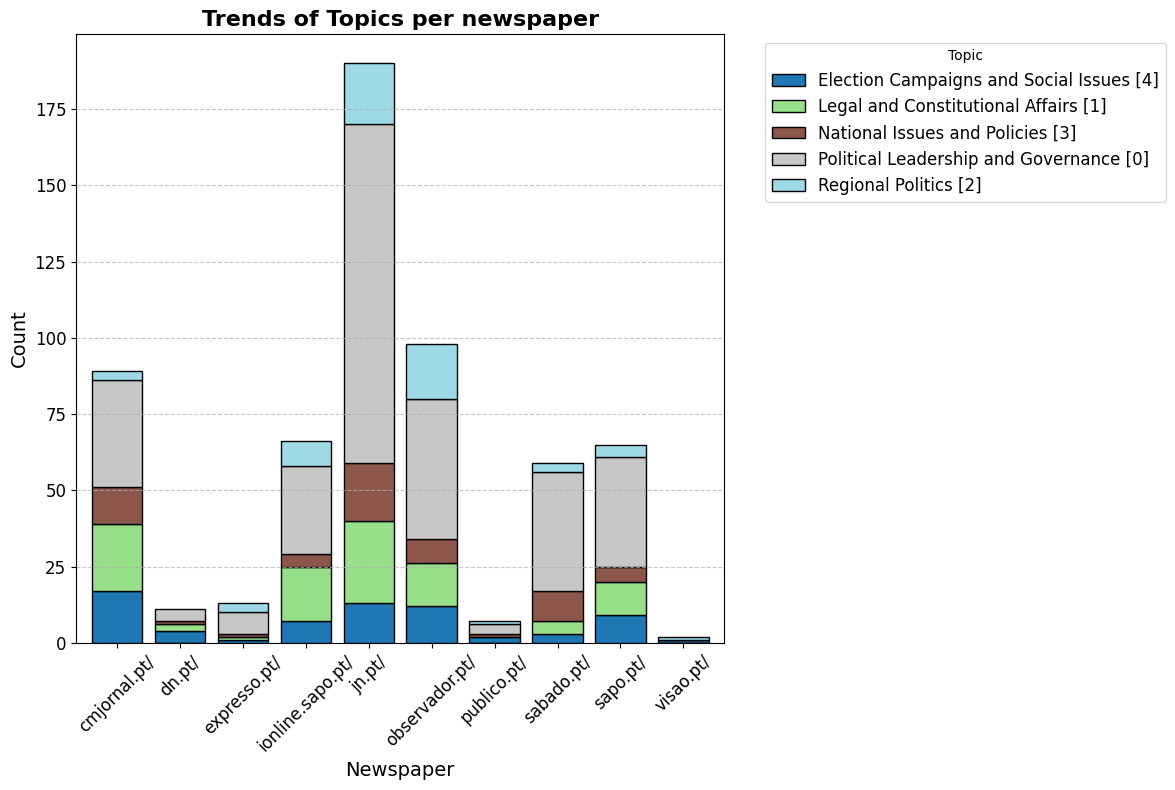

In [26]:
# Group data and create a stacked bar plot
topic_by_source = df.groupby(['newspaper', 'topic_label']).size().unstack(fill_value=0)

# Plot with improved aesthetics
plt.figure(figsize=(12, 8))
topic_by_source.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='tab20',  # Use a visually distinct colormap
    edgecolor='black',  # Add borders to the bars
    width=0.8  # Adjust bar width for better spacing
)

# Add titles and labels
plt.title('Trends of Topics per newspaper', fontsize=16, fontweight='bold')
plt.xlabel('Newspaper', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate and adjust x-axis labels
plt.yticks(fontsize=12)

# Add a legend outside the plot for clarity
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for spacing
plt.tight_layout()

plt.show()


<Axes: xlabel='topic_label'>

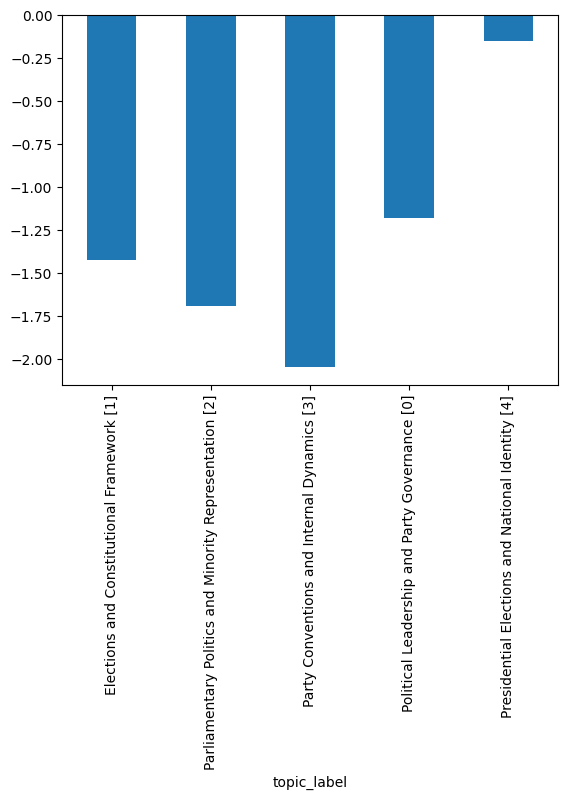

In [ ]:
topic_sentiment = df.groupby('topic_label')['sentiment'].mean()
topic_sentiment.plot(kind='bar')

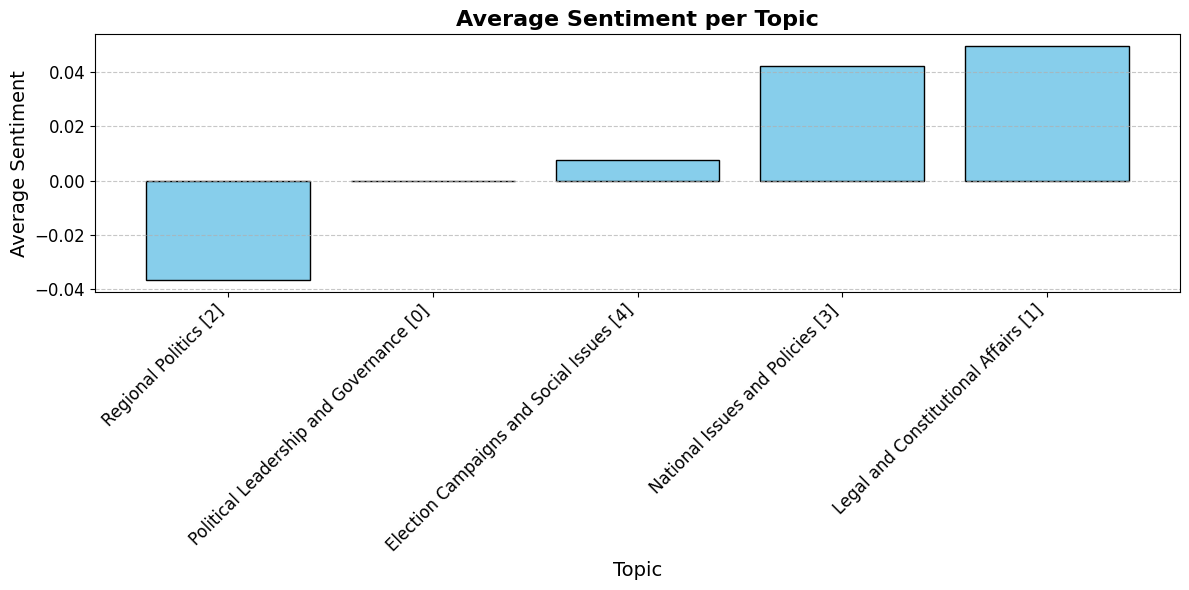

In [28]:

# Group data and create a stacked bar plot
topic_sentiment = df.groupby('topic_label')['sentiment'].mean()

# Plot with improved aesthetics
plt.figure(figsize=(12, 6))
topic_sentiment.sort_values().plot(
    kind='bar',
    color='skyblue',  # Choose a pleasant color for the bars
    edgecolor='black',  # Add borders to the bars
    width=0.8  # Adjust bar width for better spacing
)

# Add titles and labels
plt.title('Average Sentiment per Topic', fontsize=16, fontweight='bold')
plt.xlabel('Topic', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.xticks(rotation=45, fontsize=12, ha='right')  # Rotate x-axis labels for readability
plt.yticks(fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for spacing
plt.tight_layout()

plt.show()
